_After inspecting the total rainfall and the variability between both Spurs1 and Spurs2, we decided that the predetermined measure of a "rain event" (2 mm over 3 hrs) may not be a good general measure._

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import seaborn as sns
%matplotlib inline

In [36]:
data = pd.read_csv('data.csv')
data2 = pd.read_csv('data2.csv')
data = data.set_index('new_time')
data2 = data2.set_index('new_time')
data2.head(1)

,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,...,scaled_sss,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change
new_time,,,,,,,,,,,,,,,,,,,,,
2016-08-24 02:30:00.000028800,736566.104167,32.785813,29.972728,1.499305,-35.279577,0.0,0.0,0.0,2016,8,...,-0.949913,0.090521,-1.915939,3.406521,0.0,0.0,Spurs2,0.0,0.0,0.0


# Looking at Spurs1

In [108]:
print(data['precip'].sum())
data['precip'].describe()

711.9206638361812


count    9133.000000
mean        0.077950
std         0.889278
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.374674
Name: precip, dtype: float64

So we can see that though the maximum rainfall in one hour is over 35 millimeters, the mean rainfall is only 0.078 millimeters with a variance of 0.79081536 millimeters. Also, for such a small mean and variance it is curious that there were over 700 millimeters of rainfall in the year span of the data.

In [109]:
large = data[data['precip'] > 15]
print(large['precip'].count())
large['precip'].sum()

7


166.33233761510294

So we see above that there are only 7 instances of rainfall greater than 15 mm/hr for Spurs1, but they account for about 24% of the data. On the other end of the scale...

In [110]:
other = data[(data['precip'] > 0) & (data['precip'] < .21)]
print(other['precip'].count())
other['precip'].sum()

192


16.707725507309327

Very small amounts of rainfall account for about 43% of the data points we have, but only 2.3% of the rainfall.

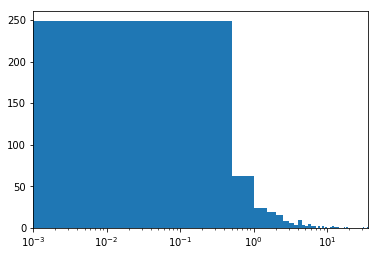

In [111]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data['precip'], bins=np.arange(0.001,36.001,0.5))
plt.xlim([0.001,36.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:71] + 0.25
#bin_centers
#print(a)

In [112]:
sums = n*bin_centers
sums

array([62.499, 47.313, 30.024, 33.269, 36.016, 22.008, 19.506, 15.004,
       42.51 , 19.004, 15.753, 28.755, 18.753, 20.253,  0.   , 15.502,
        0.   , 26.253,  0.   ,  9.751,  0.   ,  0.   , 11.251, 23.502,
       24.502, 12.751, 13.251, 13.751, 14.251,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , 17.251,  0.   , 18.251, 18.751,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , 21.751,  0.   ,  0.   , 23.251,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 31.251,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 35.251])

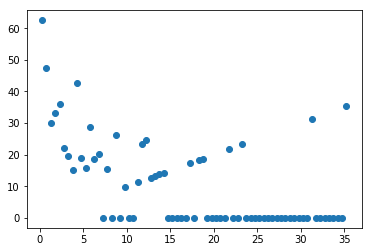

In [113]:
plt.scatter(x=bin_centers, y=sums)

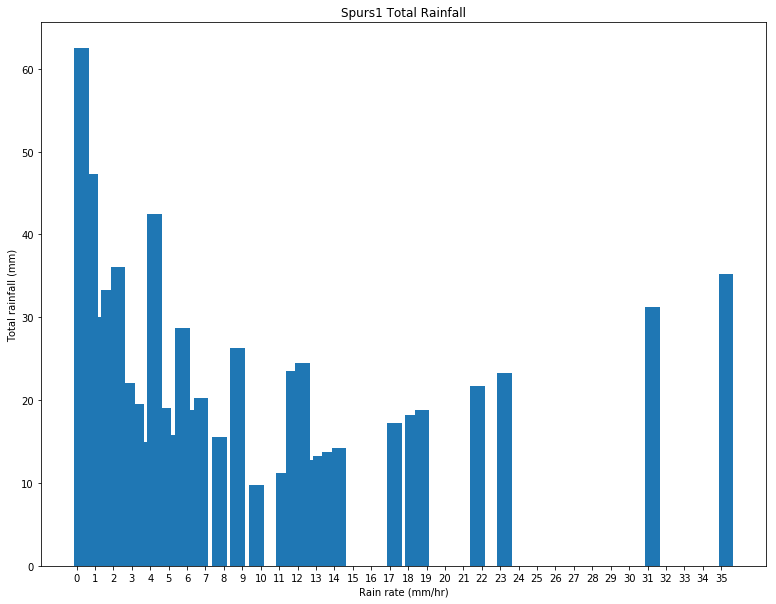

In [114]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Total Rainfall')
plt.xticks(np.arange(0,36,1));

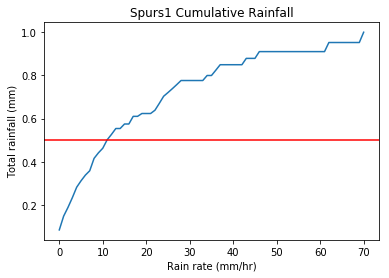

In [115]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:36]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

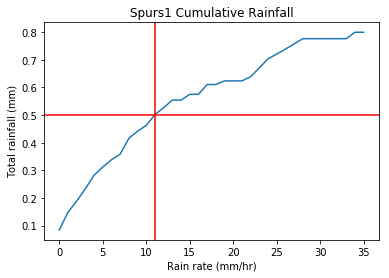

In [117]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=11, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

So we can see that the 50/50 split of rainfall occurs around to 11 millimeters/hr; half of all rainfall occurs below that margin.

# Spurs2

In [37]:
print(data2['precip'].sum())
data2['precip'].describe()

3927.2051423026883


count    10459.000000
mean         0.375486
std          1.927136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         45.403696
Name: precip, dtype: float64

In [38]:
large = data2[data2['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = data2[(data2['precip'] > 0) & (data2['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = data2[(data2['precip'] > 0.21) & (data2['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 953.5881939600546 mm over 43 events
Marginal rainfall: 58.33822054609101 mm over 656 events
Rainfall: 546.759144875758 mm over 651 events


In [39]:
data2['precip'].sum()

3927.2051423026883

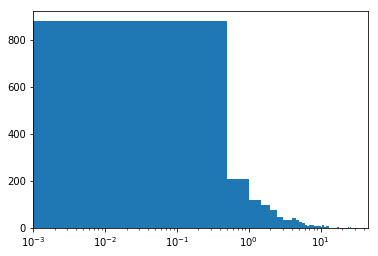

In [98]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(data2['precip'], bins=np.arange(0.001,46.001,0.5))
plt.xlim([0.001,45.501])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:91] + 0.25
#bin_centers
#print(a)

In [99]:
sums = n*bin_centers
sums

array([221.131, 155.457, 150.12 , 171.598, 168.825, 129.297, 117.036,
       127.534, 174.291, 156.783, 141.777, 126.522,  81.263,  67.51 ,
        87.012, 100.763,  66.008,  87.51 ,  74.008,  68.257,  41.004,
       118.261,  67.506,  58.755,  85.757, 127.51 ,  26.502,  13.751,
        28.502,  29.502,  30.502,  31.502,  32.502,  33.502,  86.255,
        53.253,  18.251,  18.751,  38.502,  19.751,  40.502,  20.751,
        21.251,  21.751,   0.   ,   0.   ,  23.251,   0.   ,  72.753,
         0.   ,  25.251,  25.751,  78.753,   0.   ,   0.   ,  55.502,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  61.502,   0.   ,
        31.751,   0.   ,  32.751,  33.251,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  45.251])

In [100]:
bin_centers

array([ 0.251,  0.751,  1.251,  1.751,  2.251,  2.751,  3.251,  3.751,
        4.251,  4.751,  5.251,  5.751,  6.251,  6.751,  7.251,  7.751,
        8.251,  8.751,  9.251,  9.751, 10.251, 10.751, 11.251, 11.751,
       12.251, 12.751, 13.251, 13.751, 14.251, 14.751, 15.251, 15.751,
       16.251, 16.751, 17.251, 17.751, 18.251, 18.751, 19.251, 19.751,
       20.251, 20.751, 21.251, 21.751, 22.251, 22.751, 23.251, 23.751,
       24.251, 24.751, 25.251, 25.751, 26.251, 26.751, 27.251, 27.751,
       28.251, 28.751, 29.251, 29.751, 30.251, 30.751, 31.251, 31.751,
       32.251, 32.751, 33.251, 33.751, 34.251, 34.751, 35.251, 35.751,
       36.251, 36.751, 37.251, 37.751, 38.251, 38.751, 39.251, 39.751,
       40.251, 40.751, 41.251, 41.751, 42.251, 42.751, 43.251, 43.751,
       44.251, 44.751, 45.251])

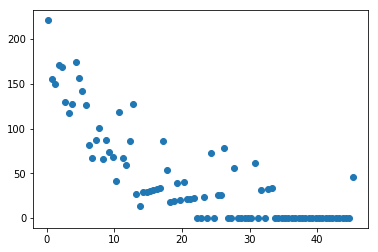

In [101]:
plt.scatter(x=bin_centers, y=sums)

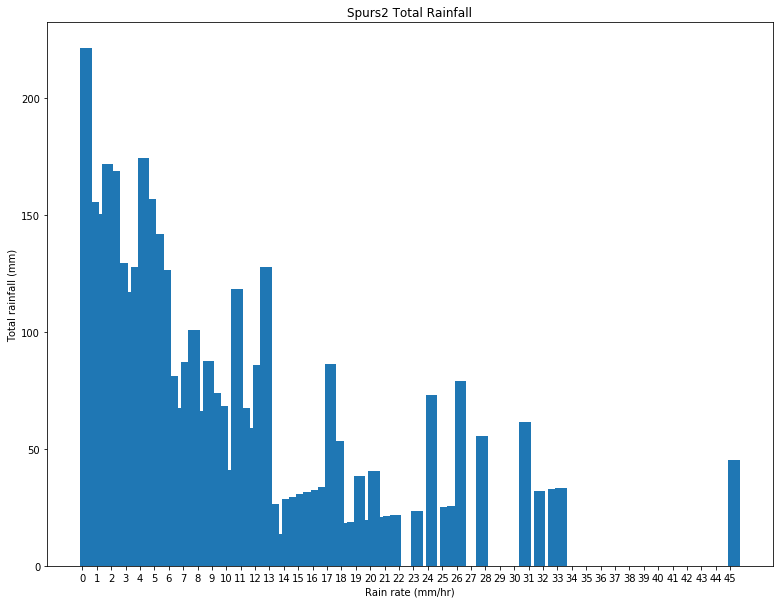

In [102]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Total Rainfall')
plt.xticks(np.arange(0,46,1));

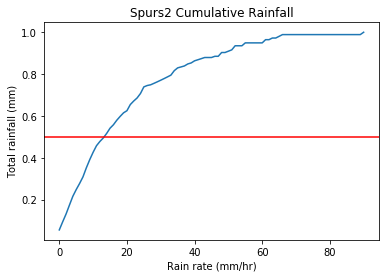

In [103]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:46]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Cumulative Rainfall');

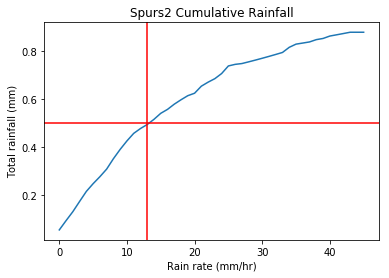

In [107]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=13, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs2 Cumulative Rainfall');

# Other Data Sets

## NTAS Set

In [22]:
ntas = pd.read_csv('ntas.csv')
ntas = ntas.set_index('new_time')
print(ntas['precip'].sum())
ntas.head()

365.16062089206594


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2001-03-31 01:00:00.000028800,730941.041667,36.224918,25.322590,7.257993,42.888125,0.0,0.0,0.0
2001-03-31 01:59:59.999971200,730941.083333,36.225780,25.307935,7.517357,42.881045,0.0,0.0,0.0
2001-03-31 03:00:00.000000000,730941.125000,36.227262,25.307050,7.063114,42.873965,0.0,0.0,0.0
2001-03-31 04:00:00.000028800,730941.166667,36.227101,25.300624,6.655590,42.866885,0.0,0.0,0.0
2001-03-31 04:59:59.999971200,730941.208333,36.227896,25.291787,7.105266,42.859806,0.0,0.0,0.0


In [23]:
ntas[['precip', 'cum_precip3']].describe()

,precip,cum_precip3
count,8169.000000,8169.000000
mean,0.044701,0.134102
std,0.430652,0.872563
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,15.928774,18.802948


In [25]:
large = ntas[ntas['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over', large['precip'].count(), 'events')
small = ntas[(ntas['precip'] > 0) & (ntas['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = ntas[(ntas['precip'] > .21) & (ntas['precip'] <= 2)]
print('Rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')

Substantive rainfall: 15.928773879325464 mm over 1 events
Marginal rainfall: 21.84174295095084 mm over 358 events
Rainfall: 118.08693571022722 mm over 183 events


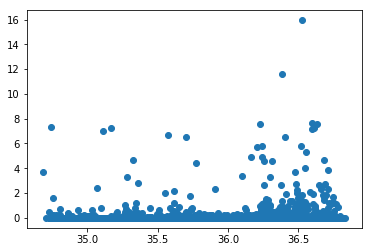

In [26]:
plt.scatter(x=ntas['sss'], y=ntas['precip'])

So here, there are very few instances of any rainfall over 8 mm in an hour.

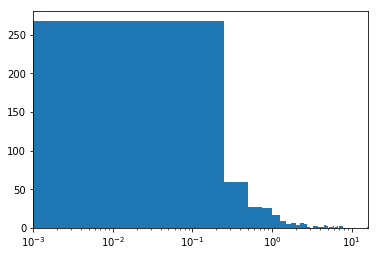

In [27]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(ntas['precip'], bins=np.arange(0.001,16.251,0.25))
plt.xlim([0.001,16.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:64] + 0.125
#bin_centers
#print(a)

In [28]:
n.shape

(64,)

[33.768 22.56  16.902 22.776 19.142 12.384  8.13  11.256  8.504 14.256
 13.13   2.876  0.    10.128  7.252  3.876  4.126  4.376 18.504  9.752
  0.     5.376  5.626 11.752  0.     6.376 13.252  0.    21.378 14.752
 22.878  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    11.626  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.    15.876]


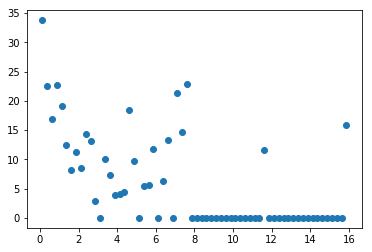

In [29]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

So here, there are very few large values that occur just once.

In [30]:
sums.cumsum()

array([ 33.768,  56.328,  73.23 ,  96.006, 115.148, 127.532, 135.662,
       146.918, 155.422, 169.678, 182.808, 185.684, 185.684, 195.812,
       203.064, 206.94 , 211.066, 215.442, 233.946, 243.698, 243.698,
       249.074, 254.7  , 266.452, 266.452, 272.828, 286.08 , 286.08 ,
       307.458, 322.21 , 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 345.088, 345.088, 345.088,
       345.088, 345.088, 345.088, 345.088, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       356.714, 356.714, 356.714, 356.714, 356.714, 356.714, 356.714,
       372.59 ])

And again, we see that this is a valid reflection of the actual summed rainfall for the NTAS buoy

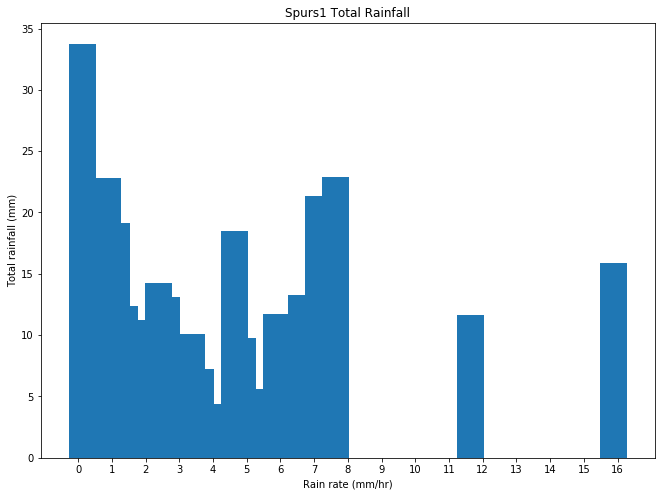

In [31]:
_, ax = plt.subplots(figsize=(11,8))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Total Rainfall')
plt.xticks(np.arange(0,17,1));

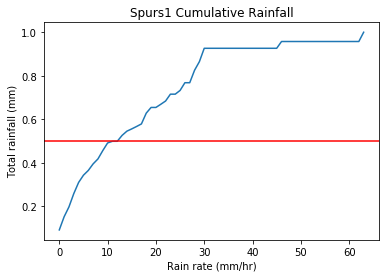

In [32]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:33]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

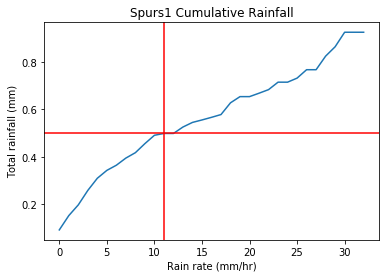

In [34]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=11, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('Spurs1 Cumulative Rainfall');

## WHOTS Set

In [3]:
whots = pd.read_csv('whots.csv')
whots = whots.set_index('new_time')
print(whots['precip'].sum())
whots.head()

899.9853937686307


,time,sss,sst,wind_spd,mld,precip,cum_precip6,cum_precip3
new_time,,,,,,,,
2004-08-13 04:00:00.000028800,732172.166667,34.825873,26.888086,7.918918,38.233802,0.000000,0.0,0.000000
2004-08-13 04:59:59.999971200,732172.208333,34.824762,26.865158,7.506199,38.236220,0.000000,0.0,0.000000
2004-08-13 06:00:00.000000000,732172.250000,34.825625,26.856876,8.299770,38.238638,0.000000,0.0,0.000000
2004-08-13 07:00:00.000028800,732172.291667,34.826258,26.842372,8.377580,38.241056,0.000000,0.0,0.000000
2004-08-13 07:59:59.999971200,732172.333333,34.825453,26.828082,8.759666,38.243474,0.350616,0.0,0.350616


In [4]:
whots[['precip', 'cum_precip3']].describe()

,precip,cum_precip3
count,8317.000000,8317.000000
mean,0.108210,0.324631
std,1.288135,3.146083
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,58.250181,119.649075


In [13]:
large = whots[whots['precip'] > 15]
print('Substantive rainfall:', large['precip'].sum(), 'mm over' ,large['precip'].count(), 'events')
small = whots[(whots['precip'] > 0) & (whots['precip'] < .21)]
print('Marginal rainfall:', small['precip'].sum(), 'mm over', small['precip'].count(), 'events')
other = whots[(whots['precip'] > .21) & (whots['precip'] < 2)]
print('Normal rainfall:', other['precip'].sum(), 'mm over', other['precip'].count(), 'events')


Substantive rainfall: 329.8583652542303 mm over 12 events
Marginal rainfall: 30.75673068121871 mm over 324 events
Normal rainfall: 188.21578865681337 mm over 307 events


So here we see that there are a whopping 12 rain events greater than 15 mm per hour, and that they make up almost 330 millimeters. This is a giant gap compared to the very small rain events.

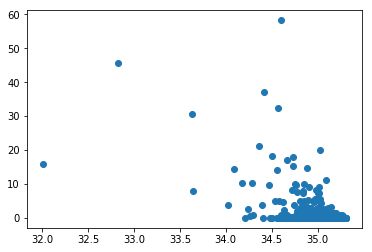

In [14]:
plt.scatter(x=whots['sss'], y=whots['precip'])

This is an interesting plot; we see that there is not much variability in salinity for most of the set, but where there is noticeable difference there is always a rain event.

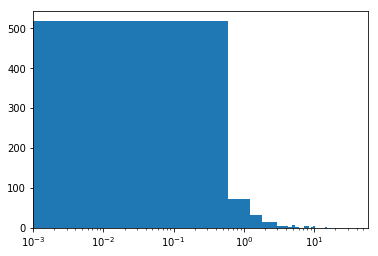

In [15]:
#plt.hist(data['precip'], bins=np.arange(0.01,0.2,0.01))
#plt.xlim([0.01,0.21])
(n, bins, patches) = plt.hist(whots['precip'], bins=np.arange(0.001,59.21,0.6))
plt.xlim([0.001,58.001])
#plt.hist(data['precip'], bins=np.arange(15,35,3))
plt.xscale('log')
plt.show()
bin_centers = bins[0:98] + 0.3
#bin_centers
#print(a)

[156.219  64.872  49.533  33.616  43.216  13.204  15.604  13.503  35.707
  17.103   0.      0.     30.004  32.404   0.     18.602  49.505  10.501
  11.101   0.      0.      0.      0.     14.101  29.402  15.301  15.901
   0.     17.101  17.701  18.301   0.      0.     20.101   0.     21.301
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.     30.301   0.      0.      0.
  32.701   0.      0.      0.      0.      0.      0.      0.     37.501
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.     45.901   0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     58.501]


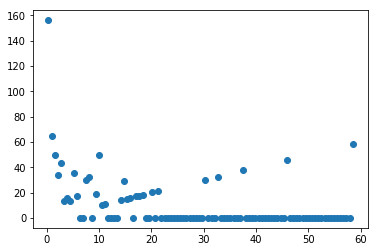

In [16]:
sums = n*bin_centers
print(sums)
plt.scatter(x=bin_centers, y=sums)

In [17]:
sums.cumsum()

array([156.219, 221.091, 270.624, 304.24 , 347.456, 360.66 , 376.264,
       389.767, 425.474, 442.577, 442.577, 442.577, 472.581, 504.985,
       504.985, 523.587, 573.092, 583.593, 594.694, 594.694, 594.694,
       594.694, 594.694, 608.795, 638.197, 653.498, 669.399, 669.399,
       686.5  , 704.201, 722.502, 722.502, 722.502, 742.603, 742.603,
       763.904, 763.904, 763.904, 763.904, 763.904, 763.904, 763.904,
       763.904, 763.904, 763.904, 763.904, 763.904, 763.904, 763.904,
       763.904, 794.205, 794.205, 794.205, 794.205, 826.906, 826.906,
       826.906, 826.906, 826.906, 826.906, 826.906, 826.906, 864.407,
       864.407, 864.407, 864.407, 864.407, 864.407, 864.407, 864.407,
       864.407, 864.407, 864.407, 864.407, 864.407, 864.407, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 910.308,
       910.308, 910.308, 910.308, 910.308, 910.308, 910.308, 968.809])

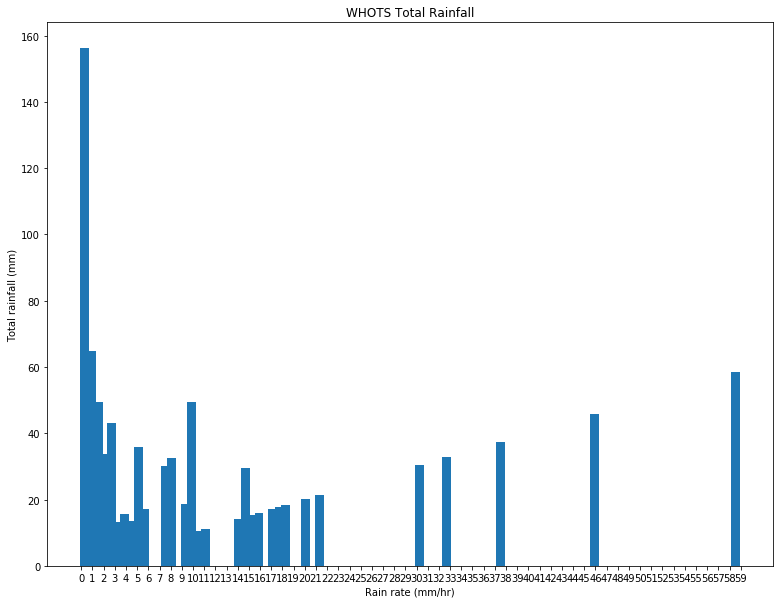

In [18]:
_, ax = plt.subplots(figsize=(13,10))
plt.bar(x=bin_centers, height=sums)
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Total Rainfall')
plt.xticks(np.arange(0,60,1));

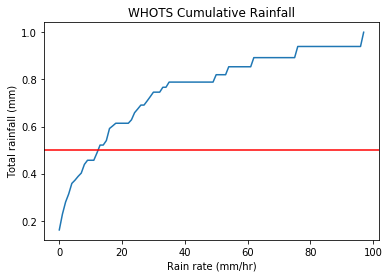

In [19]:
fullsum = sums.cumsum()/sums.sum()
halfsum = (sums.cumsum()/sums.sum())[:50]
plt.plot(fullsum)
plt.axhline(y=.5, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Cumulative Rainfall');

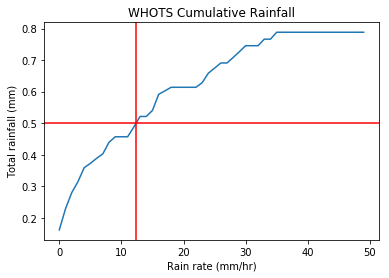

In [20]:
plt.plot(halfsum)
plt.axhline(y=.5, color='r')
plt.axvline(x=12.3, color='r')
plt.xlabel('Rain rate (mm/hr)')
plt.ylabel('Total rainfall (mm)')
plt.title('WHOTS Cumulative Rainfall');

Surprisingly enough, even with the huge variability and amount of large rain events, the 50% mark of total cumulative rainfall still lies around 12.3 millimeters/hr, which is similar to everything else we've seen.

## TPOS Set